In [7]:
import matplotlib.pyplot as plt
import os

from ultralytics import YOLO
import numpy as np

## Analyzing Images

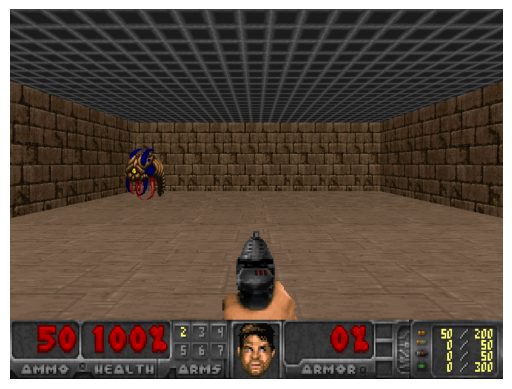

In [8]:
img = plt.imread(os.path.join(os.pardir, "screens", "screen_0011.png"))

plt.imshow(img)
plt.axis('off')
plt.show()

## Testing YOLO Models

In [9]:
# Convert image from float32 (0-1) to uint8 (0-255)
img_uint8 = (img * 255).astype(np.uint8)

# Load the YOLOv8s model
model = YOLO('yolov8s.pt')

# Run inference on the image
results = model(img_uint8)

# Display results
for result in results:
    result.show()


0: 480x640 1 person, 3.7ms
Speed: 0.9ms preprocess, 3.7ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


In [10]:
# Convert image from float32 (0-1) to uint8 (0-255)
img_uint8 = (img * 255).astype(np.uint8)

# Load the YOLOv8n model
model = YOLO('yolov8n.pt')

# Run inference on the image
results = model(img_uint8)

# Display results
for result in results:
    result.show()


0: 480x640 (no detections), 2.2ms
Speed: 0.9ms preprocess, 2.2ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)


## Vision Transformers

/home/xavier/python-venvs/doom-venv/lib64/python3.12/site-packages/torch/nn/modules/module.py:2446: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/home/xavier/python-venvs/doom-venv/lib64/python3.12/site-packages/torch/nn/modules/module.py:2446: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/home/xavier/python-venvs/doom-venv/lib64/python3.12/site-packages/torch/nn/modules/module.py:2446: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint

DETR Vision Transformer Detection Results:
Detected 0 objects



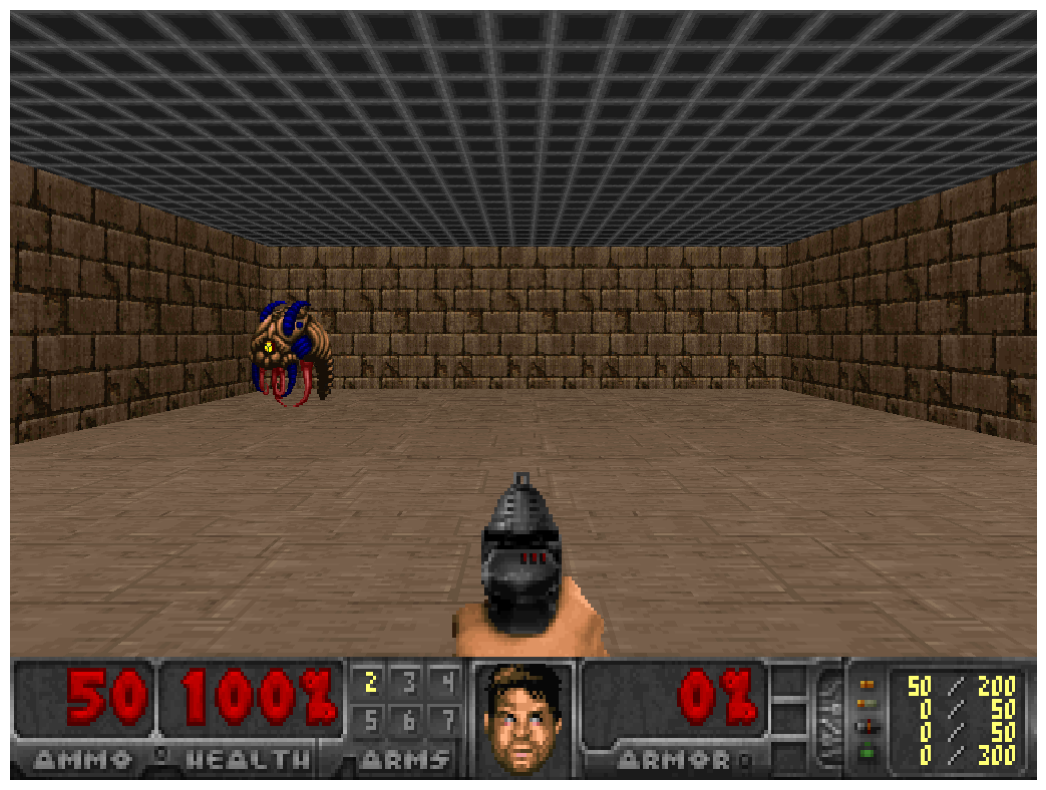

In [11]:
from transformers import AutoImageProcessor, AutoModelForObjectDetection
import torch
from PIL import Image as PILImage
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load DETR (Detection Transformer) model
# DETR is a transformer-based object detection model that provides an alternative to YOLO
processor = AutoImageProcessor.from_pretrained("facebook/detr-resnet-50")
model_detr = AutoModelForObjectDetection.from_pretrained("facebook/detr-resnet-50")

# Convert numpy array to PIL Image for processing
pil_img = PILImage.fromarray(img_uint8)

# Process the image
inputs = processor(images=pil_img, return_tensors="pt")

# Run inference
with torch.no_grad():
    outputs = model_detr(**inputs)

# Post-process results
target_sizes = torch.tensor([pil_img.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.5)[0]

# Display results with bounding boxes
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.imshow(img_uint8)

print("DETR Vision Transformer Detection Results:")
print(f"Detected {len(results['scores'])} objects\n")

# Draw bounding boxes
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    xmin, ymin, xmax, ymax = box.tolist()
    width = xmax - xmin
    height = ymax - ymin
    
    # Create rectangle patch
    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, 
                             edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
    # Add label with confidence score
    label_text = f"ID: {label.item()}, Conf: {score.item():.2f}"
    ax.text(xmin, ymin - 10, label_text, color='red', fontsize=10, 
            bbox=dict(facecolor='yellow', alpha=0.7))
    
    print(f"  Object {label.item()}: confidence {score.item():.2f}, box {box.tolist()}")

ax.axis('off')
plt.tight_layout()
plt.show()